In [ ]:
#import required packages

import networkx as nx #networks package we will use for demos
import matplotlib.pyplot as plt #networkx uses matplotlib to generate its plots

import numpy as np #this is the linear algebra package for working with matrices
import pandas as pd #pandas is a dataframe package that is useful for managing network attributes

import math #use this package to take the log of a scalar, use numpy to take the element-wise log of an array

import os

In [ ]:
%pip install 'scipy>=1.8'
import scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install 'networkx'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
url = "https://raw.githubusercontent.com/bellalam01/168project/main/final_cleaned.csv?token=GHSAT0AAAAAAB4D5CRK6BHM7ROE3FPRLVBAY4Q4Y2Q"
df = pd.read_csv(url, sep=",", header = None)

df.columns = ["Order","Language", "Influenced By", "Influenced", "Year"]

df.head()

,Order,Language,Influenced By,Influenced,Year
0,693,Z++,NaN,NaN,1.0
1,517,JEAN,NaN,NaN,1.0
2,516,Job Control Language,NaN,[Control Language],1.0
3,515,Jess,NaN,NaN,1.0
4,514,JavaFX Script,NaN,NaN,1.0


In [ ]:
#getting rid of the inaccurate cycle
df.at[462,"Influenced By"] = "[Self, Lisp, Smalltalk]"

In [ ]:
df.loc[df['Language'] == "Squeak"]

,Order,Language,Influenced By,Influenced,Year
462,244,Squeak,"[Self, Lisp, Smalltalk]","[Etoys, Scratch]",1996.0


In [ ]:
df.at[464,"Influenced"] = "[StarLogo, Scratch]"

In [ ]:
df.loc[df['Language'] == "Etoys"]

,Order,Language,Influenced By,Influenced,Year
464,243,Etoys,"[Logo, Squeak, Smalltalk]","[StarLogo, Scratch]",1996.0


In [ ]:
G = nx.DiGraph()

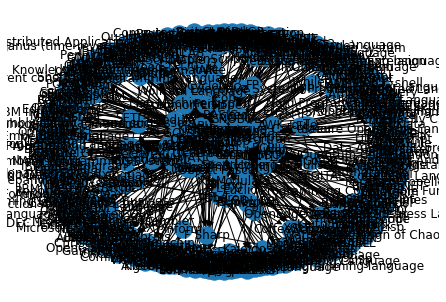

In [ ]:
# whole data set (no formatting changes)
G_test = nx.DiGraph()

for index, row in df.iterrows():
    lang = row["Language"]
    G_test.add_node(lang)
    if type(row["Influenced"]) == str:
        st = row["Influenced"]
        lis_infl = st.strip('][').split(', ')
        
        for infl in lis_infl:
            G_test.add_edge(lang, infl)

    if type(row["Influenced By"]) == str:
        st_by = row["Influenced By"]
        lis_inf_by = st_by.strip('][').split(', ')
        
        for inf_by in lis_inf_by:
            G_test.add_edge(inf_by, lang)
    
nx.draw(G_test, with_labels = True)
plt.show()

In [ ]:
# formatting changes
pos = nx.spring_layout(G_test)

plt.figure(3,figsize=(20,20)) 
nx.draw(G_test,pos, node_size=60, font_size = 8, with_labels = True)
plt.savefig('all_nodes.png') #save the figure
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# ensuring graph is DAG
nx.is_directed_acyclic_graph(G_test)

True

In [21]:
nx.is_directed(G_test)

True

In [ ]:
sorted(nx.simple_cycles(G_test))

[]

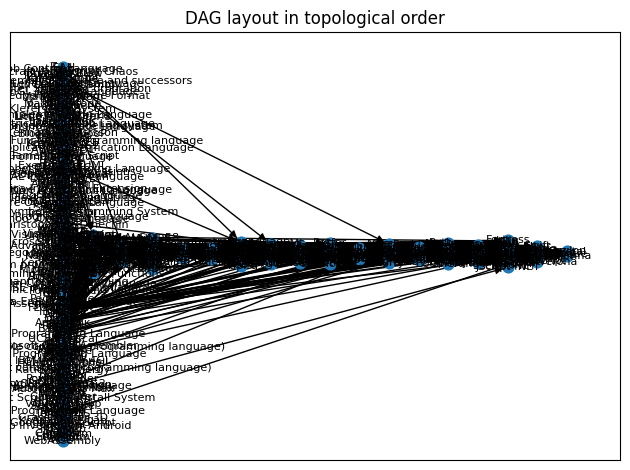

<Figure size 2000x2000 with 0 Axes>

In [ ]:
# topological layout?
for layer, nodes in enumerate(nx.topological_generations(G_test)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G_test.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G_test, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G_test, pos=pos, ax=ax,node_size=60, font_size = 8, with_labels = True)
plt.figure(3,figsize=(20,20)) 
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

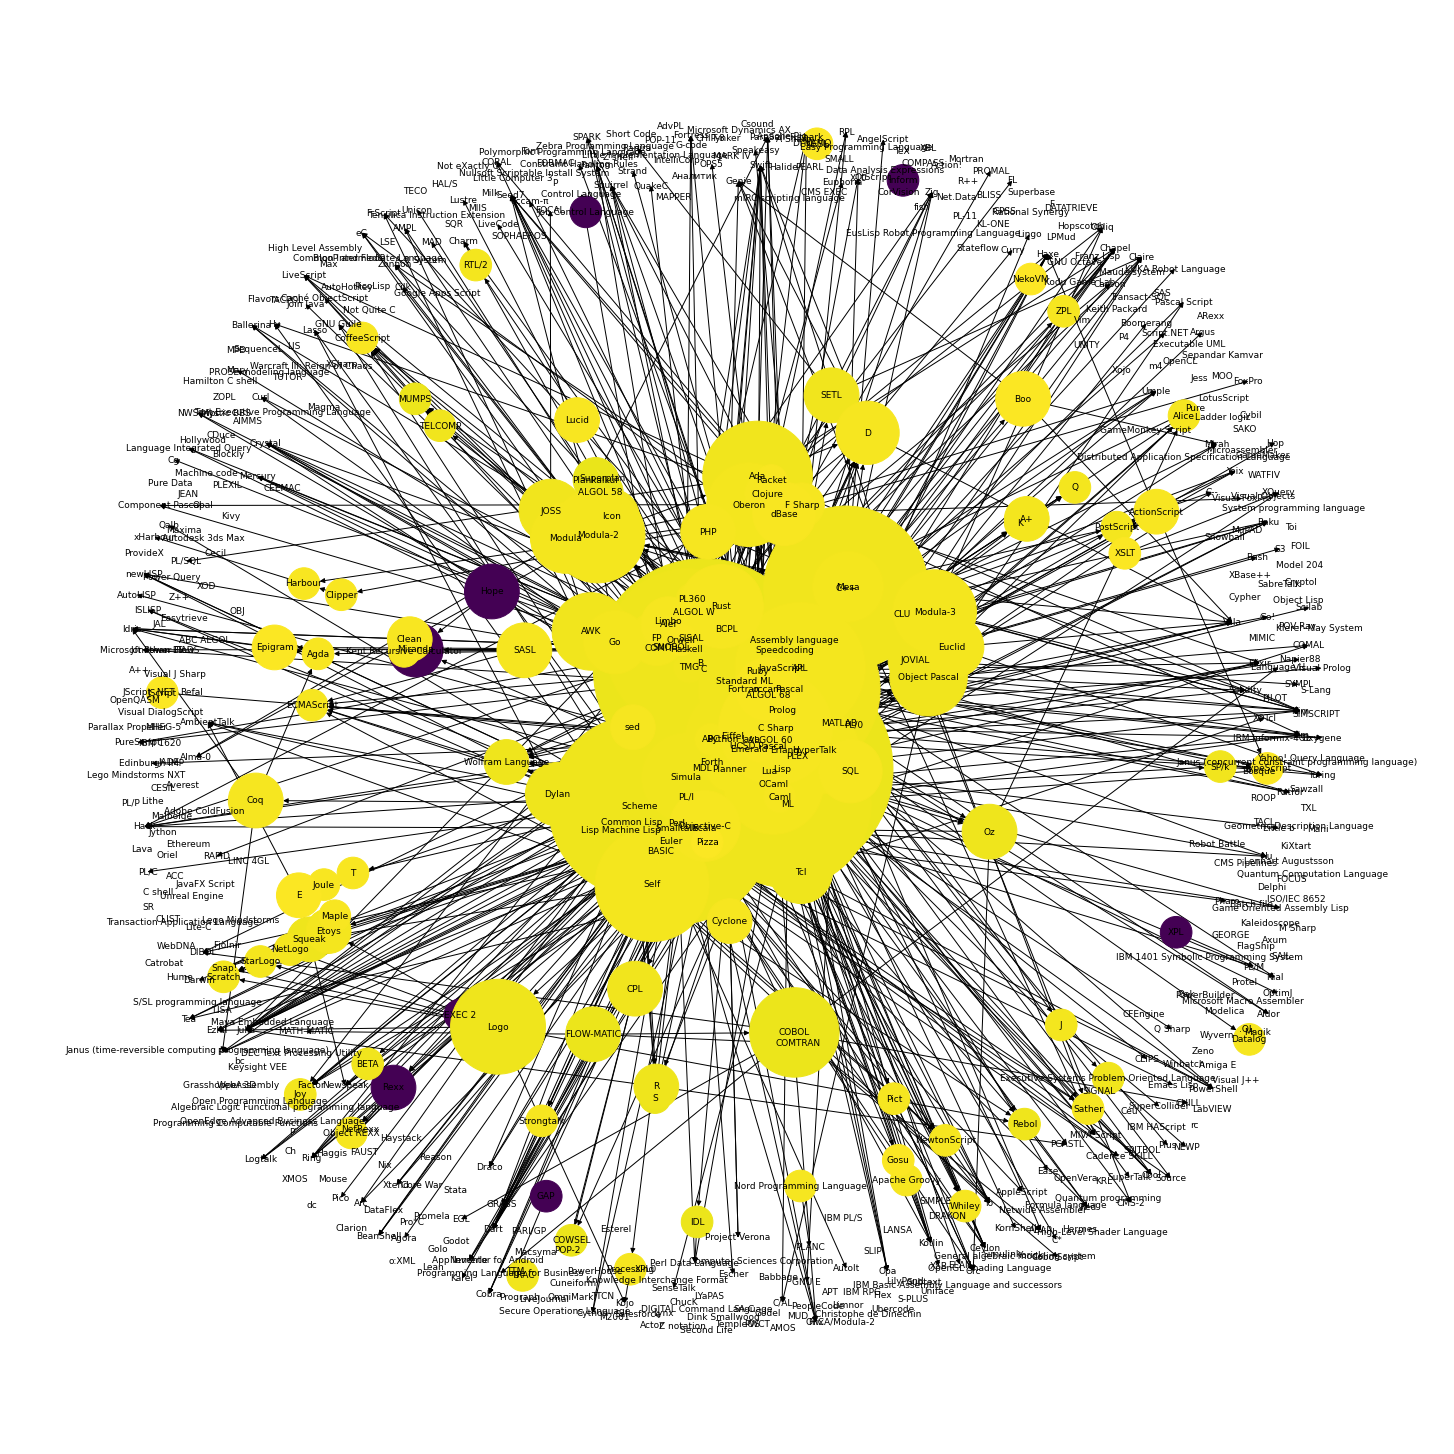

In [41]:
d = dict(G_test.out_degree)
plt.figure(3,figsize=(20,20)) 
pos = nx.spring_layout(G_test)
nx.draw(G_test, pos, node_size=[v * 1000 for v in d.values()], node_color = df["Year"]/100, font_size = 9, with_labels = True)
plt.savefig('by_out_degree.png') #save the figure

plt.show()

In [37]:
# manually make color map?
# color_map = []
# for node in G:
#     if node < 15:
#         color_map.append('orange')
#     else: 
#         color_map.append('blue')    

# G_test.nodes
df["Year"]

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
        ...  
667    2024.0
668    2024.0
669    2024.0
670    2024.0
671    2024.0
Name: Year, Length: 672, dtype: float64

In [28]:
#saving graph with better resolution

from matplotlib import pylab
def save_graph(graph,file_name):
    #initialze Figure
    plt.figure(num=None, figsize=(20, 20), dpi=80)
#     plt.axis('off')
    fig = plt.figure(1)
    pos = nx.spring_layout(graph)
    nx.draw_networkx_nodes(graph,pos)
    nx.draw_networkx_edges(graph,pos)
    nx.draw_networkx_labels(graph,pos)

    cut = 1.00
    xmax = cut * max(xx for xx, yy in pos.values())
    ymax = cut * max(yy for xx, yy in pos.values())
    plt.xlim(0, xmax)
    plt.ylim(0, ymax)

    plt.savefig(file_name,bbox_inches="tight")
    pylab.close()
    del fig

#Assuming that the graph g has nodes and edges entered
save_graph(G_test,"my_graph.pdf")